<a href="https://colab.research.google.com/github/Lavakumar14/DPA/blob/main/FinalProject_DPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn skl2onnx onnx onnxruntime openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 111.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 817.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires pr

In [ ]:
import pandas as pd
import os

# Load the dataset
file_path = "/content/data_public.csv"

# Check if the file exists
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

    # Display dataset info and preview
    print(data.info())
    print(data.head())
else:
    print(f"Error: File not found at {file_path}")
    print("Please check the file path and try again.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249447 entries, 0 to 249446
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       249447 non-null  float64
 1   B       249447 non-null  float64
 2   C       249447 non-null  float64
 3   D       249447 non-null  float64
 4   E       249447 non-null  float64
 5   F       249446 non-null  float64
 6   G       249446 non-null  float64
 7   H       249446 non-null  float64
 8   I       249446 non-null  float64
 9   J       249446 non-null  float64
 10  K       249446 non-null  float64
 11  L       249446 non-null  float64
 12  M       249446 non-null  float64
 13  N       249446 non-null  float64
 14  O       249446 non-null  float64
 15  Class   249446 non-null  float64
dtypes: float64(16)
memory usage: 30.5 MB
None
            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047186  76.904999   
1  -38.019

In [ ]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(columns=["Class"])
y = data["Class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Ensure the target variable contains integers (discrete classes)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))  # Random Forest with parallelization
])

# Define hyperparameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [100],       # Number of trees
    'classifier__max_depth': [10, None],     # Tree depth
    'classifier__max_features': ['sqrt'] # Features considered at each split
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Test 10 random combinations
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_pipeline = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print best parameters
print("\nBest Hyperparameters:")
print(random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.35      0.41      7473
           2       0.75      1.00      0.86     18816
           3       0.75      0.63      0.69     23601

    accuracy                           0.73     49890
   macro avg       0.67      0.66      0.65     49890
weighted avg       0.72      0.73      0.71     49890


Best Hyperparameters:
{'classifier__n_estimators': 100, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}


Top Features:
   Feature  Importance
14       O    0.182570
8        I    0.138145
3        D    0.129898
10       K    0.128995
13       N    0.108036
4        E    0.086550
7        H    0.077844
12       M    0.030930
6        G    0.028624
9        J    0.024826


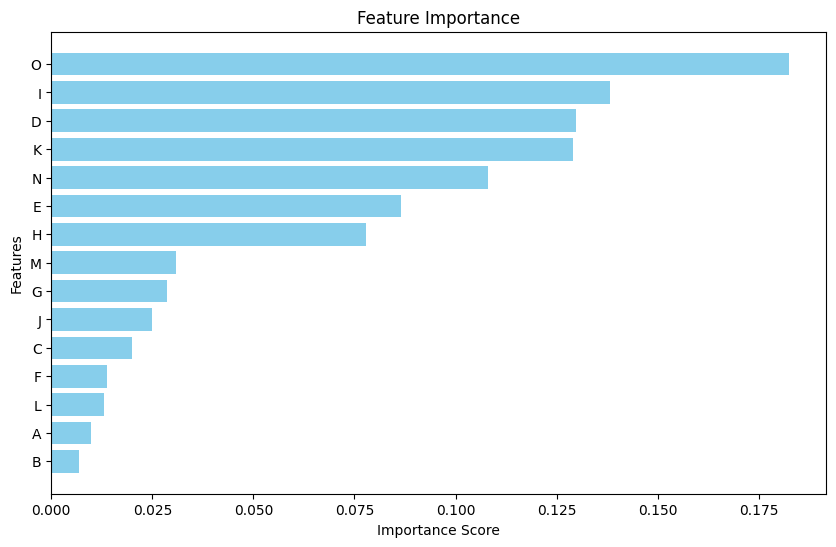

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Retrieve the Random Forest model from the best pipeline
rf_model = best_pipeline.named_steps['classifier']

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color='skyblue'
)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


In [ ]:
!pip install onnxconverter-common
!pip install skl2onnx

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType  # Import FloatTensorType
import onnxruntime as rt
from sklearn.metrics import classification_report

# Evaluate model
y_pred = best_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert to ONNX
print("Converting pipeline to ONNX format...")
input_features = [(name, FloatTensorType([None, 1])) for name in X.columns]
onnx_model = convert_sklearn(best_pipeline, initial_types=input_features, options={id(best_pipeline.named_steps['classifier']): {'zipmap': False}})

# Save ONNX model
onnx_model_path = "model_pipeline.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())
print(f"ONNX model saved at {onnx_model_path}")

# Load ONNX model for inference
print("Loading ONNX model for inference...")
session = rt.InferenceSession(onnx_model_path)

# Prepare test data for ONNX
onnx_inputs = {name: X_test[name].values.astype(np.float32).reshape(-1, 1) for name in X.columns}

# Run predictions using ONNX runtime
print("Running predictions using ONNX runtime...")
onnx_outputs = session.run(None, onnx_inputs)  # Ensure this runs without errors

# Extract probabilities and compute labels
if len(onnx_outputs) > 0:
    output_probabilities = onnx_outputs[0]  # Assuming the first output contains probabilities
    print(f"ONNX raw output shape: {output_probabilities.shape}")

    # Check if probabilities or raw labels
    if output_probabilities.ndim > 1:
        # If probabilities are provided, calculate labels
        output_labels = np.argmax(output_probabilities, axis=1) + 1  # Adjust index to match class labels
    else:
        # Raw labels are directly provided
        output_labels = output_probabilities.astype(int)
else:
    print("Error: ONNX output is empty.")
    output_probabilities = None
    output_labels = None

# Print probabilities and labels
if output_probabilities is not None:
    print("\nOutput Probabilities (First 10):")
    print(output_probabilities[:10])

if output_labels is not None:
    print("\nOutput Labels (First 10):")
    print(output_labels[:10])

# Evaluate ONNX predictions (if labels exist)
if output_labels is not None:
    print("\nONNX Model Predictions:")
    print(classification_report(y_test, output_labels))
else:
    print("No valid ONNX predictions to evaluate.")



Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.35      0.41      7473
           2       0.75      1.00      0.86     18816
           3       0.75      0.63      0.69     23601

    accuracy                           0.73     49890
   macro avg       0.67      0.66      0.65     49890
weighted avg       0.72      0.73      0.71     49890

Converting pipeline to ONNX format...
ONNX model saved at model_pipeline.onnx
Loading ONNX model for inference...
Running predictions using ONNX runtime...
ONNX raw output shape: (49890,)

Output Probabilities (First 10):
[1 2 3 3 2 3 2 3 2 3]

Output Labels (First 10):
[1 2 3 3 2 3 2 3 2 3]

ONNX Model Predictions:
              precision    recall  f1-score   support

           1       0.50      0.35      0.41      7473
           2       0.75      1.00      0.86     18816
           3       0.75      0.63      0.69     23601

    accuracy                           0.73     49890
   ma

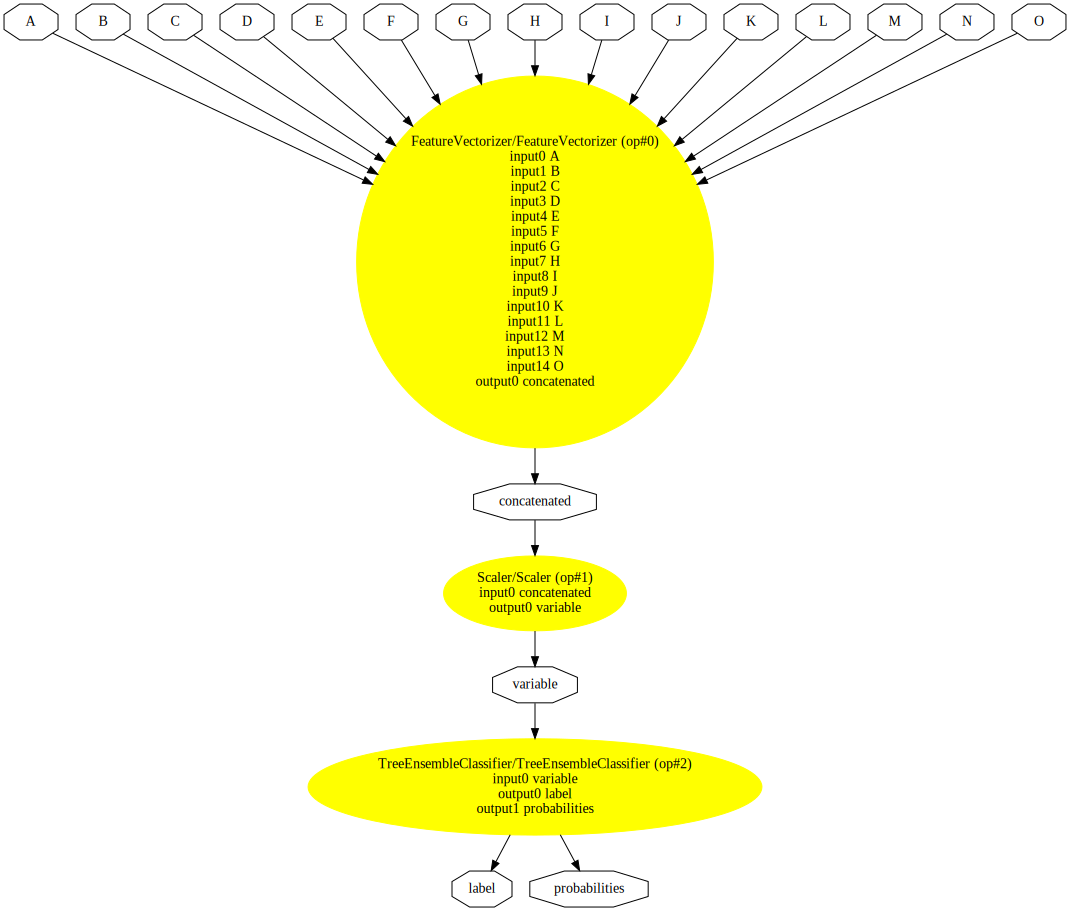

In [ ]:
!pip install pydot graphviz
!pip install onnx
import onnx
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import graphviz

# Load the ONNX model
onnx_model_path = "model_pipeline.onnx"
model_onnx = onnx.load(onnx_model_path)

# Generate a visualization graph
pydot_graph = GetPydotGraph(
    model_onnx.graph,
    name=model_onnx.graph.name,
    rankdir="TB",  # Top-to-Bottom layout
    node_producer=GetOpNodeProducer("docstring", color="yellow", fillcolor="yellow", style="filled")
)

# Render the graph using graphviz
graphviz.Source(pydot_graph.to_string())
